## Problem Statements:

### Use random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [2]:
data=pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Check in the statistics terms to get basic ideas

In [3]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Checking of null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


### Checking of duplicates 

In [5]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


### Create numerical variable for categorical data

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

### Take high taxable.income above 30000 beacause it is the average of Taxable.income

In [7]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

### Assigning the values of independent and target varibales from the data to a new variable

In [8]:
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [9]:
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

### Train test split at a ratio of 70:30

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Constructing a Random forest classfier model

In [11]:
model = RandomForestClassifier(n_estimators=110, max_features=3)

In [12]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

### Predicting the model on the train data, to evaluate the train accuracy

In [13]:
Y_pred=model.predict(x_train)

In [14]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


### Finding the train accuracy

In [15]:
model.score(x_train, y_train)

1.0

### Predicting the model on the test data

In [16]:
y_pred=model.predict(x_test)

In [17]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7388888888888889


### Finding the test accuracy

In [18]:
model.score(x_test, y_test)

0.7388888888888889

### Identifying the important features that contribute to the output and sorting it in ascending order

In [19]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.534620
Work.Experience    0.273161
Marital.Status     0.090775
Urban              0.052417
Undergrad          0.049028
dtype: float64

### Creating a bar plot

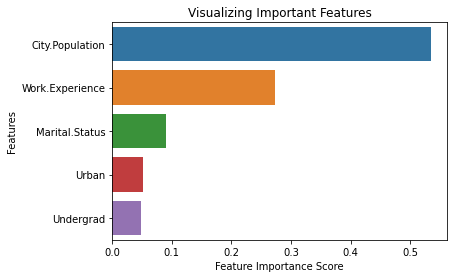

In [20]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Running a loop from the range of 1 to 5 for different max_features in the Random forest classifier

In [21]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,5):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

### Jotting down the test accuracies for different max_features of the Random Forest classifier

In [22]:
data = pd.DataFrame({'max_features':range(1,5),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.705556
1,2,1.0,0.700000
2,3,1.0,0.700000
3,4,1.0,0.711111


### Visulizing accuracy graph to look over max_depth

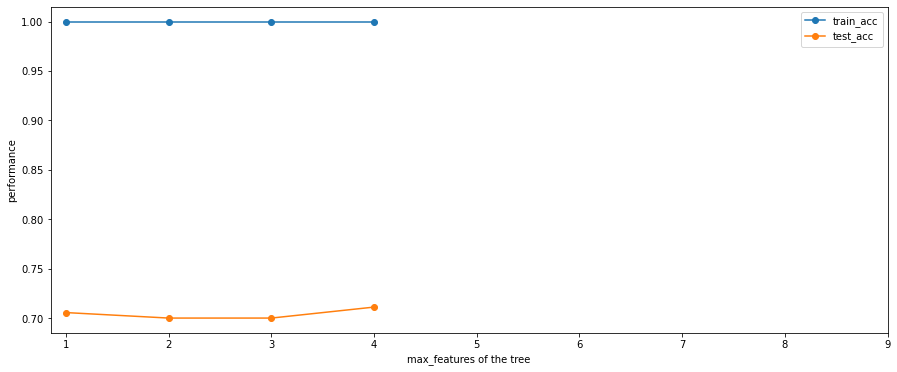

In [23]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

### Confusion matrix

In [24]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  1,  35],
       [ 12, 132]], dtype=int64)

### Visualising the confusion Matrix with heatmap

Text(0.5, 1.0, 'Accuracy Score: 0.7111111111111111')

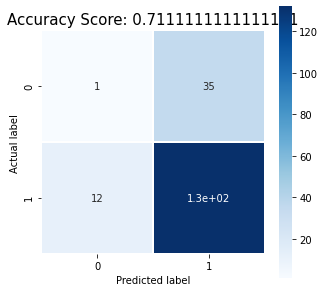

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

### Predicting the values of test data

In [26]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.06      0.03      0.04        36
           1       0.78      0.88      0.83       144

    accuracy                           0.71       180
   macro avg       0.42      0.45      0.43       180
weighted avg       0.64      0.71      0.67       180



### Trying a cross validation KFold split, to check if the accuracy of the model increases

In [27]:
kfold=KFold(n_splits=8,random_state=7)

In [28]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7416666666666667


### Constructing an Adaboost classifier to classify the highes risk of fraud taxable income, with teh cross validation Kfold

In [29]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7916666666666666


### Evaluating the Adaboost classfier with the train test split and checking the accuracy

In [30]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [31]:
Y_pred=model.predict(x_train)

In [32]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 0.7928571428571428


In [33]:
model.score(x_train, y_train)

0.7928571428571428

### Predict the model on the test data

In [34]:
y_pred=model.predict(x_test)

In [35]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7944444444444444


## Conclusion:
### It is evident that the highest accuracy from the Random forest classifier is, when it takes 1 maximum feature, of 76.1% . Thus, it can be used as the final model to predict and meet the objective of the problem.
### Also, the Adaboost classifier gives an accuracy of 77.22% to classify the data that has a higher risk of bein a fraud in taxable income.